In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Titanic-Dataset.csv')

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data['Age'].fillna(data['Age'].median(),inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

data.drop(columns=['Cabin'],inplace=True)

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
data = pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)

data.drop(columns=['Name','Ticket'],inplace=True)

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Age','Fare','SibSp','Parch']
scalar = StandardScaler()
data[num_cols] = scalar.fit_transform(data[num_cols])
data[num_cols].head()

,Age,Fare,SibSp,Parch
0,-0.565736,-0.502445,0.432793,-0.473674
1,0.663861,0.786845,0.432793,-0.473674
2,-0.258337,-0.488854,-0.474545,-0.473674
3,0.433312,0.420730,0.432793,-0.473674
4,0.433312,-0.486337,-0.474545,-0.473674


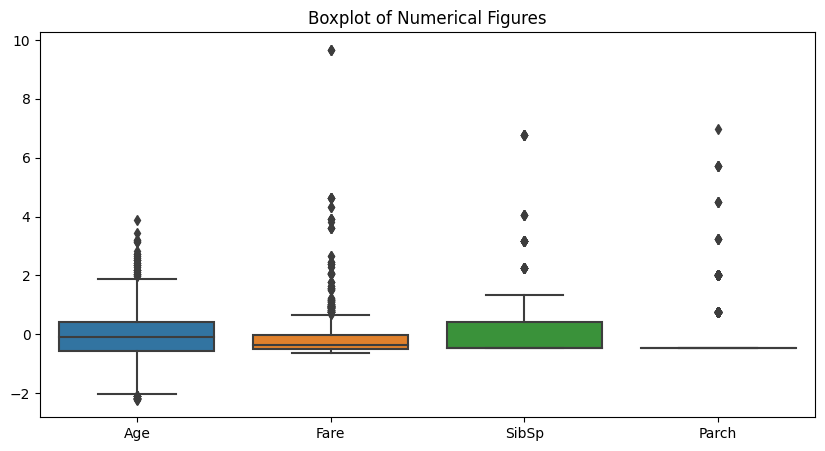

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot of Numerical Figures")
plt.show()
plt.savefig("outlier_boxplot.png")

In [22]:
def remove_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    higher = Q3 + 1.5*IQR
    return data[(data[column]>=lower) & (data[column]<=higher)]

data = remove_outliers(data,'Fare')
data = remove_outliers(data,'Age')
data.shape

(708, 10)